In [205]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df= pd.read_csv('NFLX.csv')

In [207]:
df.head(),df.tail()

(         Date        Open        High         Low       Close   Adj Close  \
 0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
 1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
 2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
 3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
 4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
 
      Volume  
 0  11896100  
 1  12595800  
 2   8981500  
 3   9306700  
 4  16906900  ,
             Date        Open        High         Low       Close   Adj Close  \
 1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
 1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
 1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
 1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
 1008  2022-02-04  407.309998  412

In [208]:
print(f'Number of Entries: {len(df)}')

Number of Entries: 1009


In [209]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [210]:
df.drop(columns=['Volume'], inplace=True)


In [211]:
df.drop(columns=['Adj Close'], inplace=True)

In [212]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Close'>

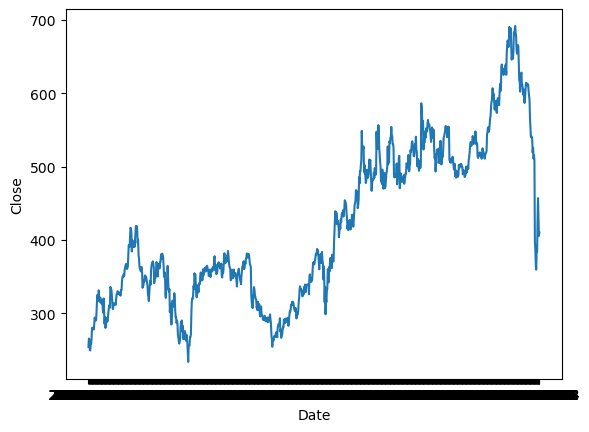

In [213]:
sns.lineplot(x=df.Date, y=df.Close)


In [214]:
columns = ['Open', 'High', 'Low','Close']
df = df[columns].values.astype(np.float32)

In [215]:
df

array([[262.  , 267.9 , 250.03, 254.26],
       [247.7 , 266.7 , 245.  , 265.72],
       [266.58, 272.45, 264.33, 264.56],
       ...,
       [448.25, 451.98, 426.48, 429.48],
       [421.44, 429.26, 404.28, 405.6 ],
       [407.31, 412.77, 396.64, 410.17]], dtype=float32)

In [216]:
scaler = StandardScaler()

In [217]:
scaledDF = scaler.fit_transform(df)

In [218]:
scaledDF

array([[-1.4477717 , -1.4414655 , -1.5101413 , -1.5220467 ],
       [-1.5795887 , -1.4524534 , -1.5569308 , -1.4161673 ],
       [-1.4055535 , -1.399802  , -1.3771212 , -1.4268845 ],
       ...,
       [ 0.2690756 ,  0.24411318,  0.13121518,  0.09681849],
       [ 0.02194181,  0.03607133, -0.07529165, -0.12380989],
       [-0.10830818, -0.11492402, -0.14635958, -0.0815874 ]],
      dtype=float32)

In [219]:
isinstance(scaledDF, np.ndarray)

True

In [220]:
isinstance(scaledDF, torch.Tensor)

False

In [221]:
print(scaledDF.shape)
# print(scaledDF[i - 10:i, 0:scaledDF.shape[1]])

(1009, 4)


In [222]:
dataX = []
dataY = []
for i in range(10, len(scaledDF)):
    dataX.append(scaledDF[i - 10:i, 0:scaledDF.shape[1]])
    dataY.append(scaledDF[i,0])

In [223]:
class stockPredictionDataset(Dataset):
    def __init__(self,X,y):
        self.X=torch.tensor(X,dtype=torch.float32)
        self.y=torch.tensor(X,dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self,index):
        return self.X[index],self.y[index]
    

In [224]:
last100Days=100
split=scaledDF.shape[0]-last100Days
Xtrain=dataX[0:split]
ytrain=dataY[0:split]
Xtest=dataX[split:]
ytest=dataY[split:]
trainData=stockPredictionDataset(Xtrain,ytrain)
testData=stockPredictionDataset(Xtest,ytest)

In [225]:
trainLoader=DataLoader(trainData,batch_size=2,shuffle=True)
testLoader=DataLoader(testData,batch_size=2)

In [226]:
class stockPredictionModel(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_layers):
        super(stockPredictionModel,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.ltsm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)
        self.dropout = nn.Dropout(0.7)
    def forward(self,input):
        output,hiddenState=self.ltsm(input)
        output=torch.relu(output)
        output = self.dropout(output)
        output=self.fc(output)
        return output

In [227]:
model=stockPredictionModel(4,50,1,3)

In [228]:
criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

In [229]:
trainLoss = []
trainMAE = []  # List to store MAE for each epoch
NUM_EPOCHS = 50

# Training Loop
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    total_mae = 0
    model.train()
    for inputs, targets in trainLoader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = criterion(y_pred, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        mae = torch.mean(torch.abs(y_pred - targets))
        total_mae += mae.item()

    avg_loss = total_loss / len(trainLoader)
    avg_mae = total_mae / len(trainLoader)
    print(f"Epoch: {epoch+1}/{NUM_EPOCHS}  Loss: {avg_loss:.4f}  MAE: {avg_mae:.4f}")
    trainLoss.append(avg_loss)
    trainMAE.append(avg_mae)

# Final Train Loss and MAE
print(f"Final Train Loss: {trainLoss[-1]}  Final Train MAE: {trainMAE[-1]}")

/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2, 10, 4])) that is different to the input size (torch.Size([2, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 10, 4])) that is different to the input size (torch.Size([1, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/50  Loss: 0.7406  MAE: 0.7759
Epoch: 2/50  Loss: 0.7360  MAE: 0.7694
Epoch: 3/50  Loss: 0.7348  MAE: 0.7658
Epoch: 4/50  Loss: 0.7321  MAE: 0.7634
Epoch: 5/50  Loss: 0.7307  MAE: 0.7622
Epoch: 6/50  Loss: 0.7282  MAE: 0.7642
Epoch: 7/50  Loss: 0.7263  MAE: 0.7614
Epoch: 8/50  Loss: 0.7240  MAE: 0.7588
Epoch: 9/50  Loss: 0.7203  MAE: 0.7597
Epoch: 10/50  Loss: 0.7186  MAE: 0.7582
Epoch: 11/50  Loss: 0.7137  MAE: 0.7519
Epoch: 12/50  Loss: 0.7106  MAE: 0.7520
Epoch: 13/50  Loss: 0.7063  MAE: 0.7508
Epoch: 14/50  Loss: 0.6968  MAE: 0.7457
Epoch: 15/50  Loss: 0.6887  MAE: 0.7412
Epoch: 16/50  Loss: 0.6795  MAE: 0.7342
Epoch: 17/50  Loss: 0.6664  MAE: 0.7264
Epoch: 18/50  Loss: 0.6473  MAE: 0.7157
Epoch: 19/50  Loss: 0.6245  MAE: 0.6993
Epoch: 20/50  Loss: 0.5929  MAE: 0.6793
Epoch: 21/50  Loss: 0.5564  MAE: 0.6517
Epoch: 22/50  Loss: 0.5145  MAE: 0.6208
Epoch: 23/50  Loss: 0.4727  MAE: 0.5865
Epoch: 24/50  Loss: 0.4291  MAE: 0.5498
Epoch: 25/50  Loss: 0.3989  MAE: 0.5239
Epoch: 26

In [230]:
testLoss = []
testMAE = []
predictions=[]
actuals=[]
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    total_loss = 0
    total_mae = 0
    for inputs, targets in testLoader:
        y_pred = model(inputs)
        loss = criterion(y_pred, targets)
        total_loss += loss.item()
        predictions.extend(y_pred.numpy())
        actuals.extend(targets.numpy())
        # Calculate MAE
        mae = torch.mean(torch.abs(y_pred - targets))
        total_mae += mae.item()

    avg_loss = total_loss / len(testLoader)
    avg_mae = total_mae / len(testLoader)
    print(f"Test Loss: {avg_loss:.4f}  Test MAE: {avg_mae:.4f}")
    testLoss.append(avg_loss)
    testMAE.append(avg_mae)

# Final Test Loss and MAE
print(f"Final Test Loss: {testLoss[-1]}  Final Test MAE: {testMAE[-1]}")

Test Loss: 1.4415  Test MAE: 1.0884
Final Test Loss: 1.4414647304349475  Final Test MAE: 1.088387699921926


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2, 10, 4])) that is different to the input size (torch.Size([2, 10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [231]:
len(testLoader)

45

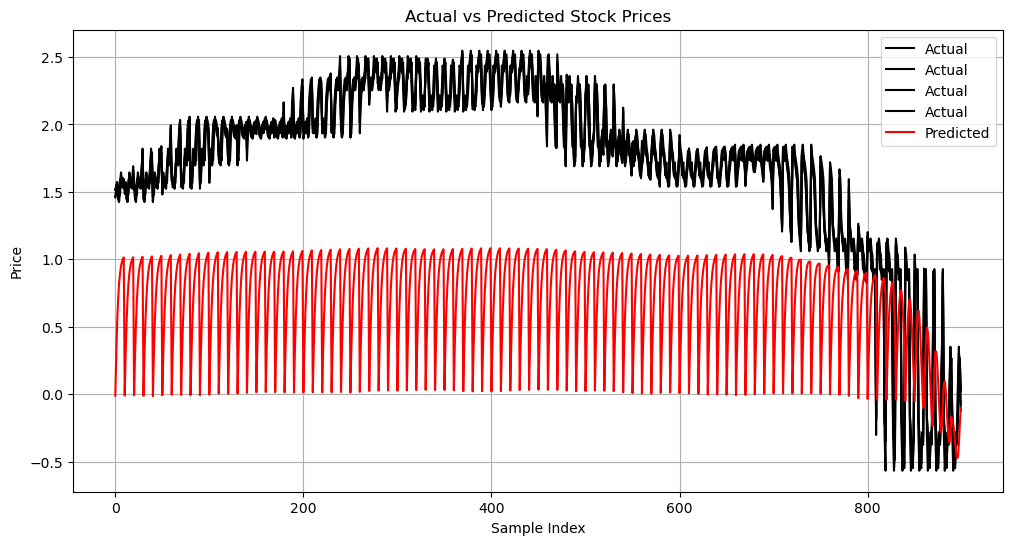

In [232]:
predictions = np.concatenate(predictions, axis=0).squeeze()
actuals = np.concatenate(actuals, axis=0).squeeze()

# Plotting actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual', color='black')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()